In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
path = "C:/Users/RC/Downloads/diamonds/"
fl = "diamonds_data.csv"
data = pd.read_csv(path + fl)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

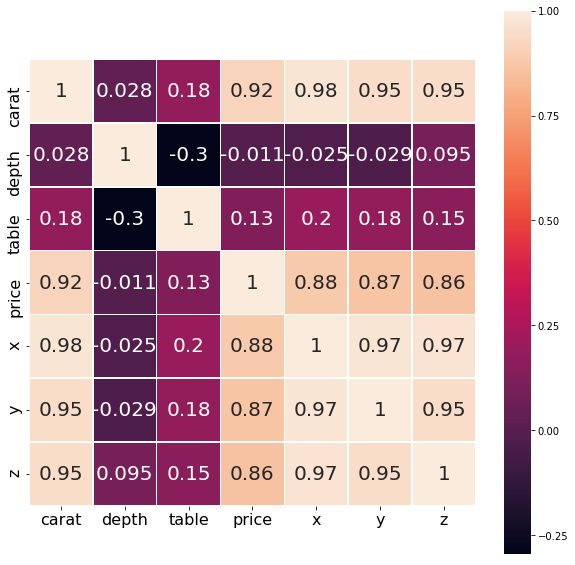

In [5]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = sns.heatmap(data.corr(), annot=True, square=True, linecolor='white',linewidths=.5,annot_kws={"size": 20}) 


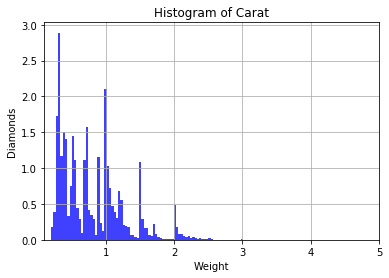

In [6]:
n, bins, patches = plt.hist(data["carat"], bins="auto", density=True, facecolor='b', alpha=0.75)
plt.xlabel('Weight')
plt.ylabel('Diamonds')
plt.title('Histogram of Carat')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0.1, 5)
#plt.ylim(0, 10)
plt.grid(True)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.show()

(3, 3)


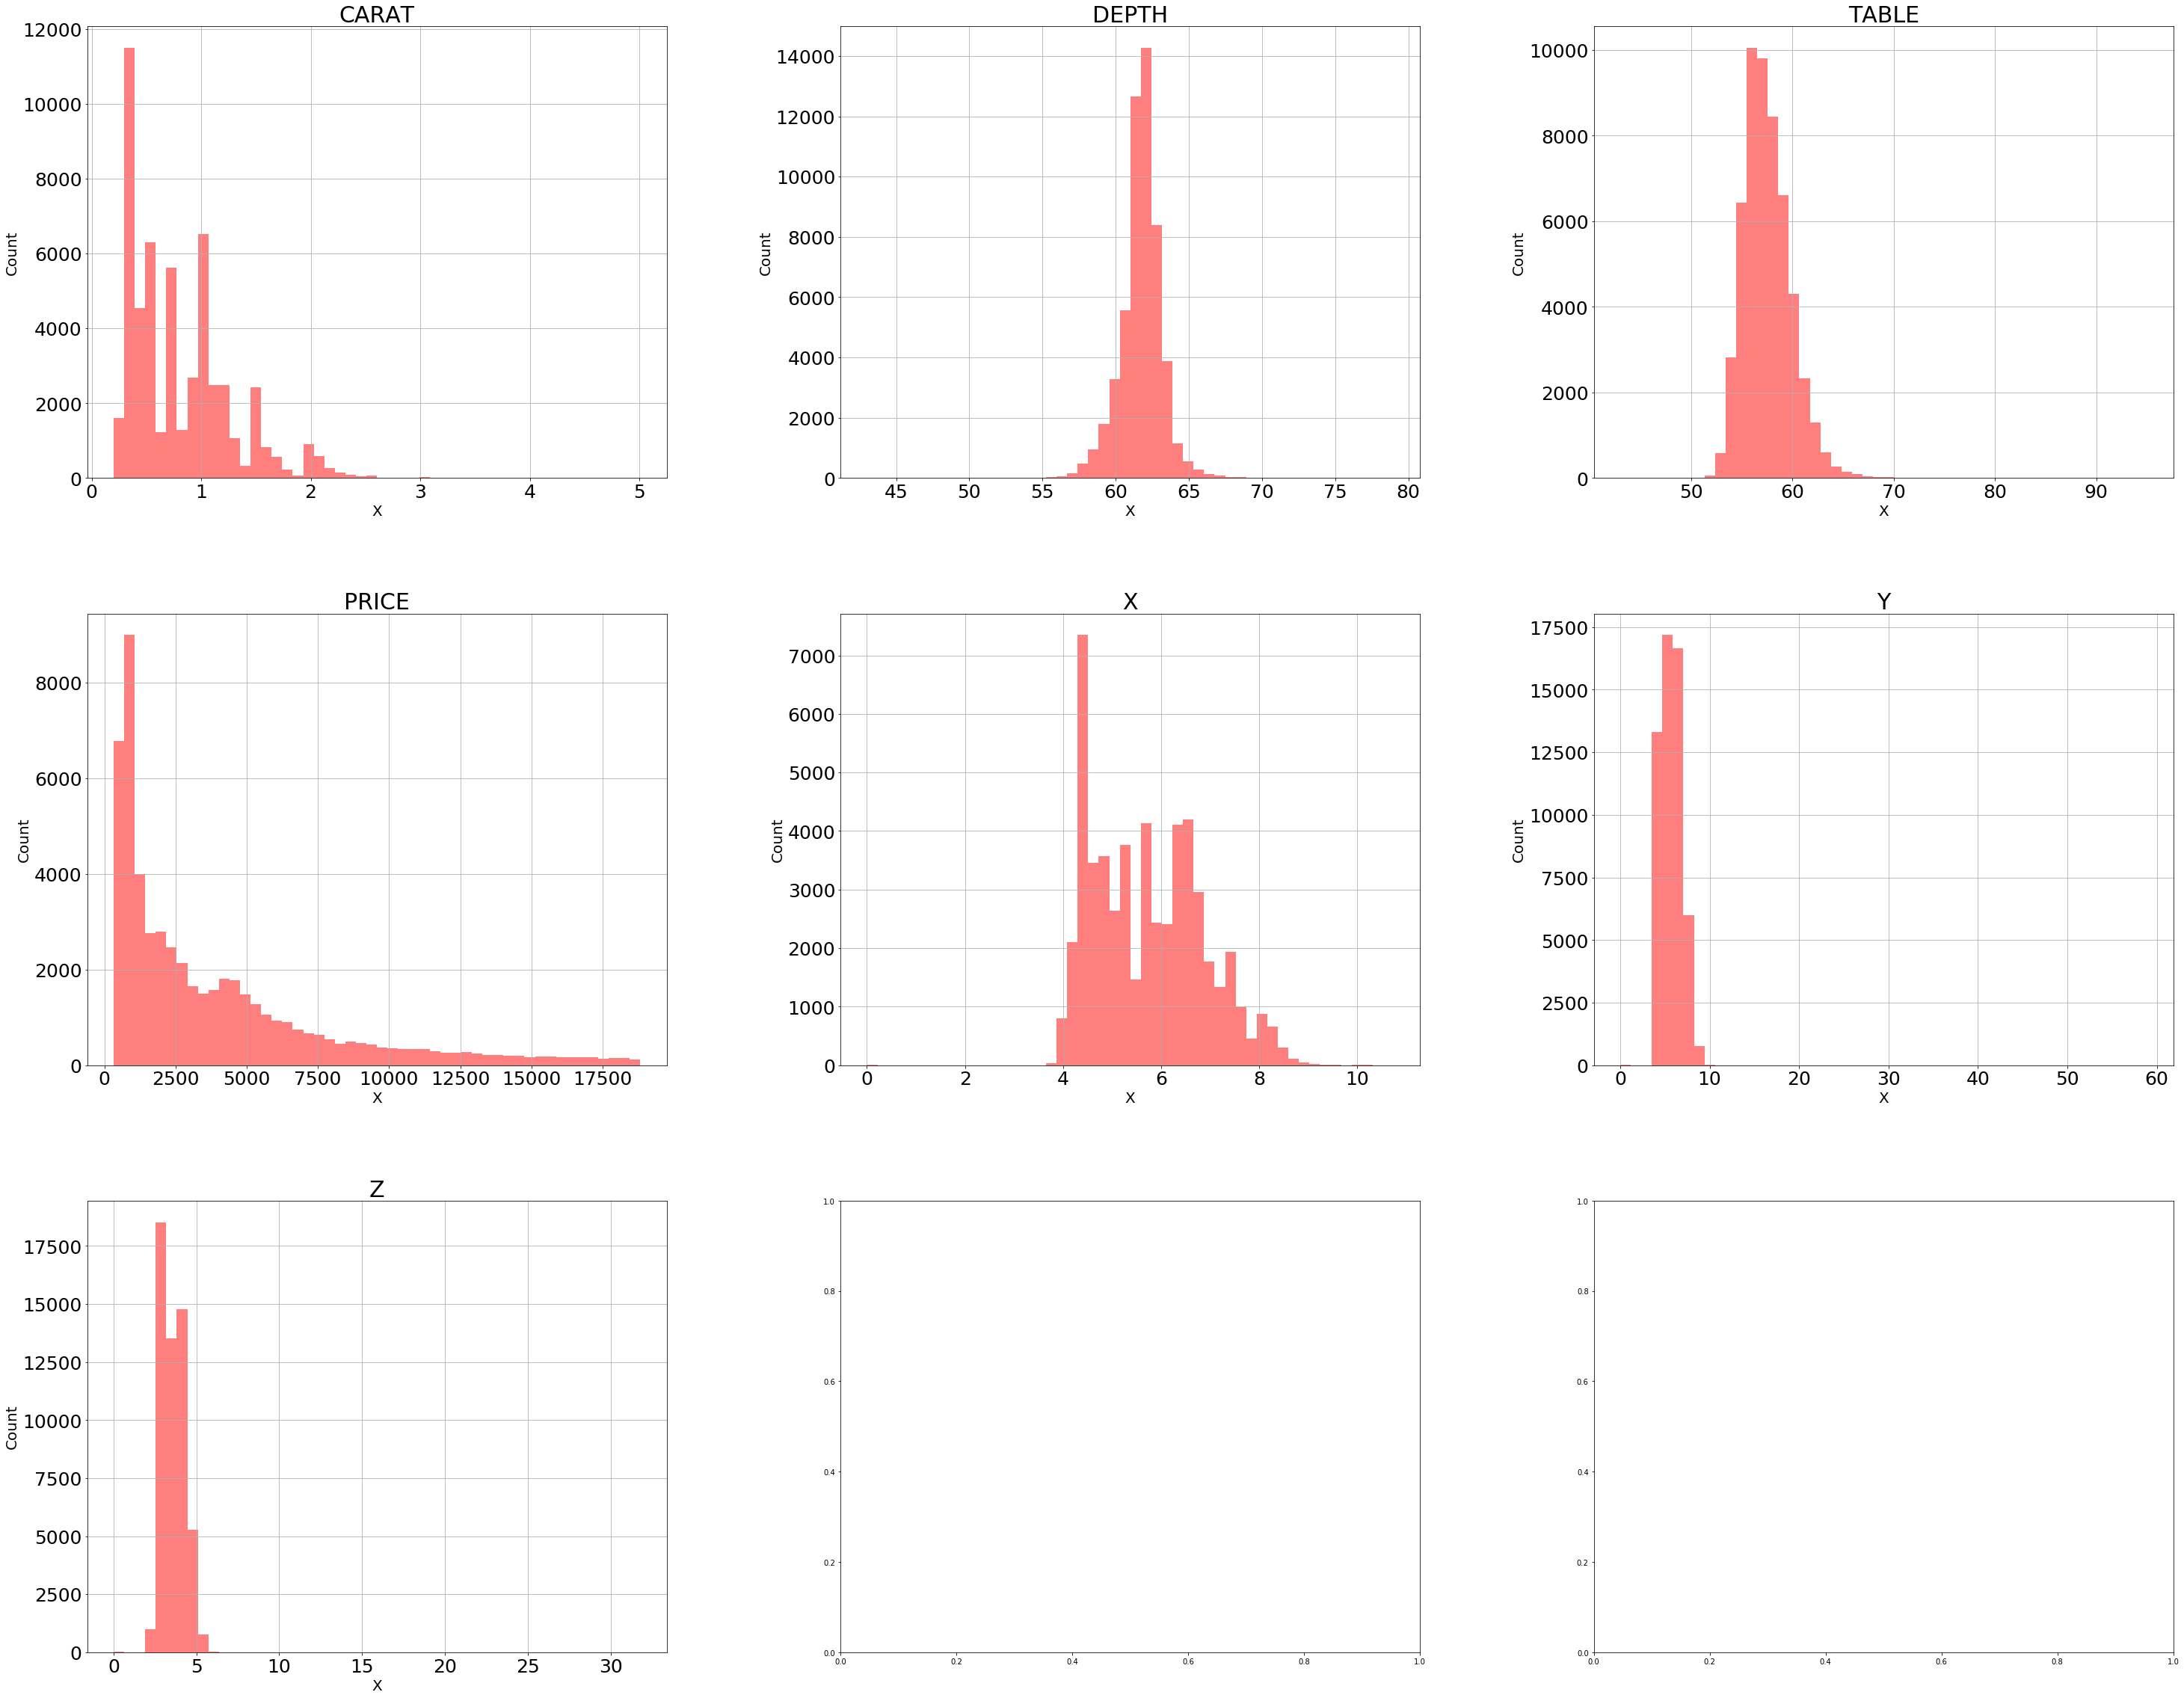

In [7]:
cols = ["carat","depth","table","price","x","y","z"]
fig, axes = plt.subplots(3, 3, figsize=(50, 40))
print(axes.shape)
for col in cols:
    j = cols.index(col)
    i = j % 3
    j = int(j / 3)
    data.hist(column=col, bins=50, ax=axes[j,i], alpha=0.5, color='red')
    axes[j,i].set_title(col.upper(),  fontsize=30)
    axes[j,i].set_xlabel("X",fontsize=20)
    axes[j,i].set_ylabel("Count",fontsize=20)
    axes[j,i].tick_params(axis='y',labelsize=25)
    axes[j,i].tick_params(axis='x',labelsize=25)

In [8]:
#There is min values equal zero in x,y and z. It is not possible.
data.describe()

,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797976,61.749325,57.457328,3933.054942,5.731236,5.734601,3.538776
std,0.474035,1.432711,2.234578,3989.628569,1.121807,1.142184,0.705729
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
data.loc[data["x"] == 0,"x"] = np.nan
data.loc[data["y"] == 0,"y"] = np.nan
data.loc[data["z"] == 0,"z"] = np.nan
100*data.isnull().sum()/data.shape[0]

carat      0.000000
cut        0.000000
color      0.000000
clarity    0.000000
depth      0.000000
table      0.000000
price      0.000000
x          0.014834
y          0.012980
z          0.037085
dtype: float64

In [10]:
data.dropna(inplace=True)
100*data.isnull().sum()/data.shape[0]

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

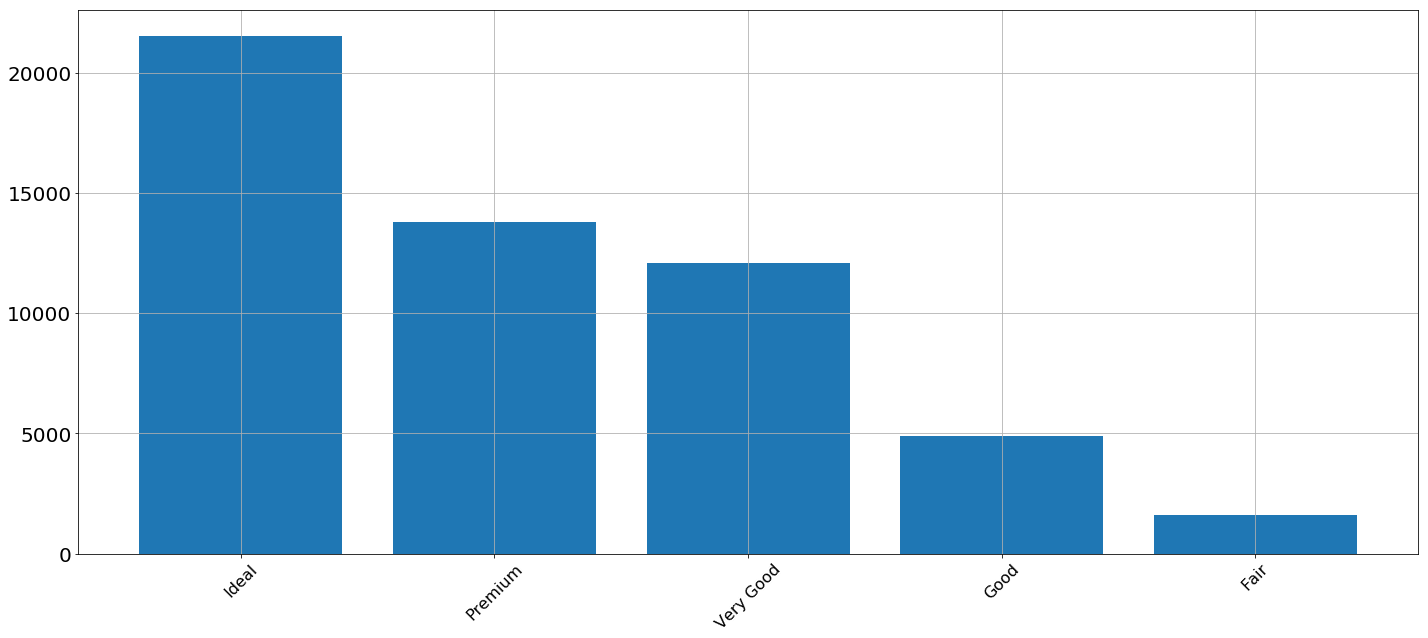

In [11]:
shape_ind = data["cut"].value_counts().index
shape_num = data["cut"].value_counts().values

plt.subplots(figsize=(24,10))
plt.bar(shape_ind, shape_num)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=20)
plt.grid(True)
#plt.barh(y_pos, performance, align='center', alpha=0.5)
#plt.yticks(y_pos, objects)
#plt.xlabel('Usage')
#plt.title('Programming language usage')

#plt.show()

plt.show()

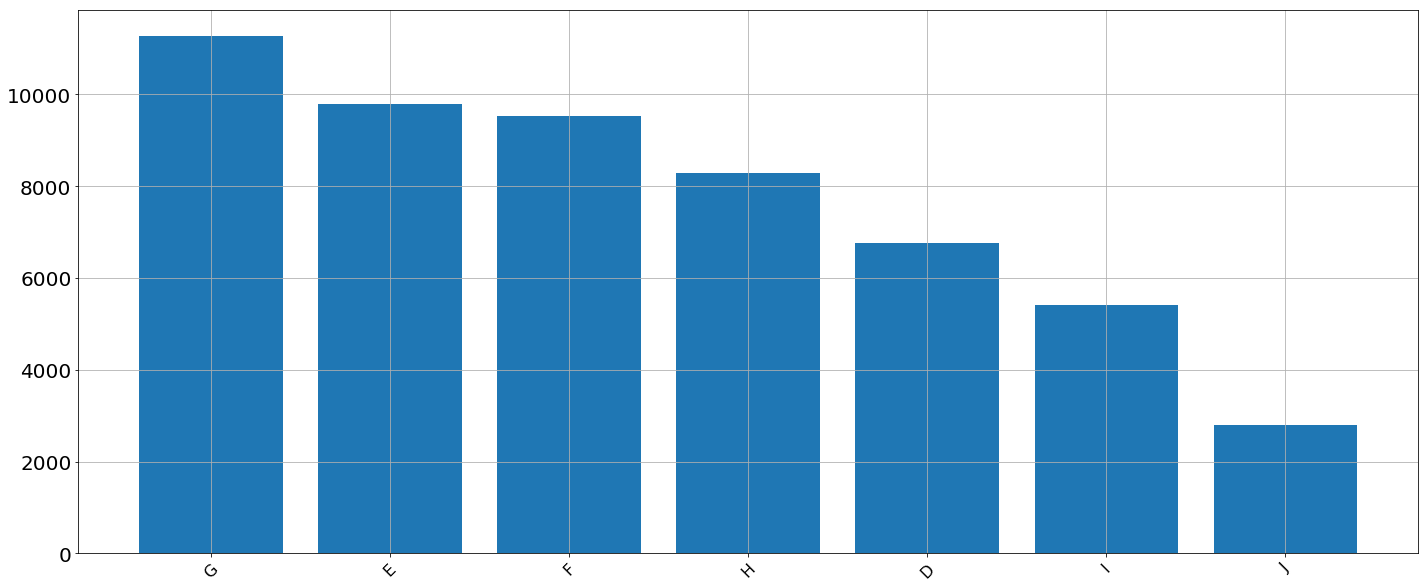

In [12]:
shape_ind = data["color"].value_counts().index
shape_num = data["color"].value_counts().values

plt.subplots(figsize=(24,10))
plt.bar(shape_ind, shape_num)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=20)
plt.grid(True)
#plt.barh(y_pos, performance, align='center', alpha=0.5)
#plt.yticks(y_pos, objects)
#plt.xlabel('Usage')
#plt.title('Programming language usage')

#plt.show()

plt.show()

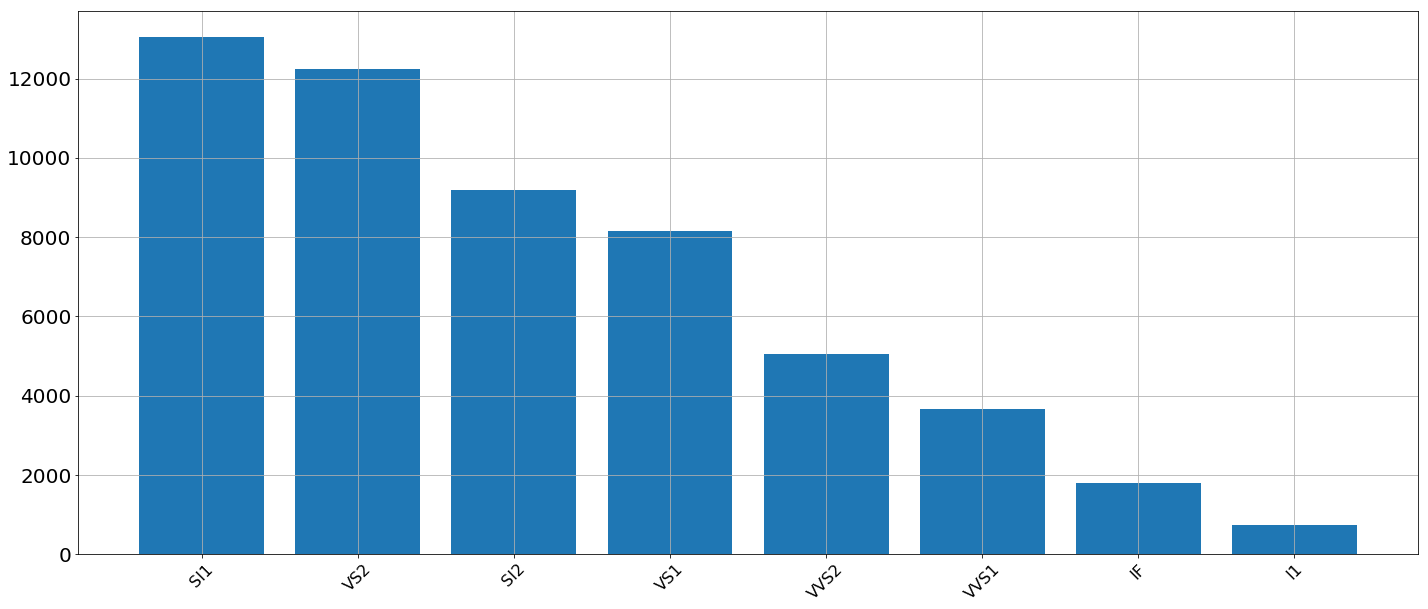

In [13]:
shape_ind = data["clarity"].value_counts().index
shape_num = data["clarity"].value_counts().values

plt.subplots(figsize=(24,10))
plt.bar(shape_ind, shape_num)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=20)
plt.grid(True)
#plt.barh(y_pos, performance, align='center', alpha=0.5)
#plt.yticks(y_pos, objects)
#plt.xlabel('Usage')
#plt.title('Programming language usage')

#plt.show()

plt.show()

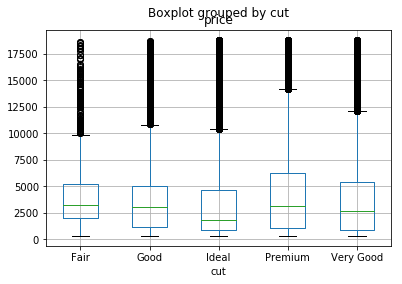

In [14]:
boxplot = data.boxplot(column=['price'],by="cut")

In [15]:
def encode_cat(data):
    le = preprocessing.LabelEncoder()
    le.fit(data)
    return le.transform(data) 
cat_cols = ["cut","color","clarity"]

for col in cat_cols:
    data[col] = encode_cat(data[col])

In [16]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [17]:
#Correct columns names order
y = data["price"]
x = data.drop(columns=["price"])

scaler = preprocessing.MinMaxScaler(feature_range=(0.1, 1.1))
data2 = scaler.fit_transform(x)
data2 = pd.DataFrame(data2)
data2.columns = x.columns
x = data2

C:\Users\RC\Anaconda2\envs\tesis\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
x = data2
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 123, test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37737, 9)
(37737,)
(16173, 9)
(16173,)


In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn import linear_model
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

#lin_reg = linear_model.LinearRegression()
#lin_reg.fit(x_train,y_train)
#y_pred_lr = lin_reg.predict(x_test)
#print("Mean absolute error LR:",mean_absolute_error(y_test,y_pred_lr))

#svr = SVR()
#svr.fit(x_train,y_train)
#y_pred_svr = svr.predict(x_test)
#print("Mean absolute error LR:",mean_absolute_error(y_test,y_pred_svr))

rndf_reg = RandomForestRegressor(max_depth=10, random_state=0,
                             n_estimators=100)
rndf_reg.fit(x_train,y_train)
y_pred_rndf = rndf_reg.predict(x_test)
print("Mean absolute error LR:",mean_absolute_error(y_test,y_pred_rndf))



y_pred = y_pred_rndf

print("accuracy: "+ str(rndf_reg.score(x_test,y_test)*100) + "%")
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=x_test.shape[0]
p=x_test.shape[1] - 1
adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Mean absolute error LR: 304.0969590323791
accuracy: 97.91546019274813%
Mean squared error: 335332.5875799892
R Squared: 0.9791546019274813
Adjusted R Squared: 0.9791442849771855


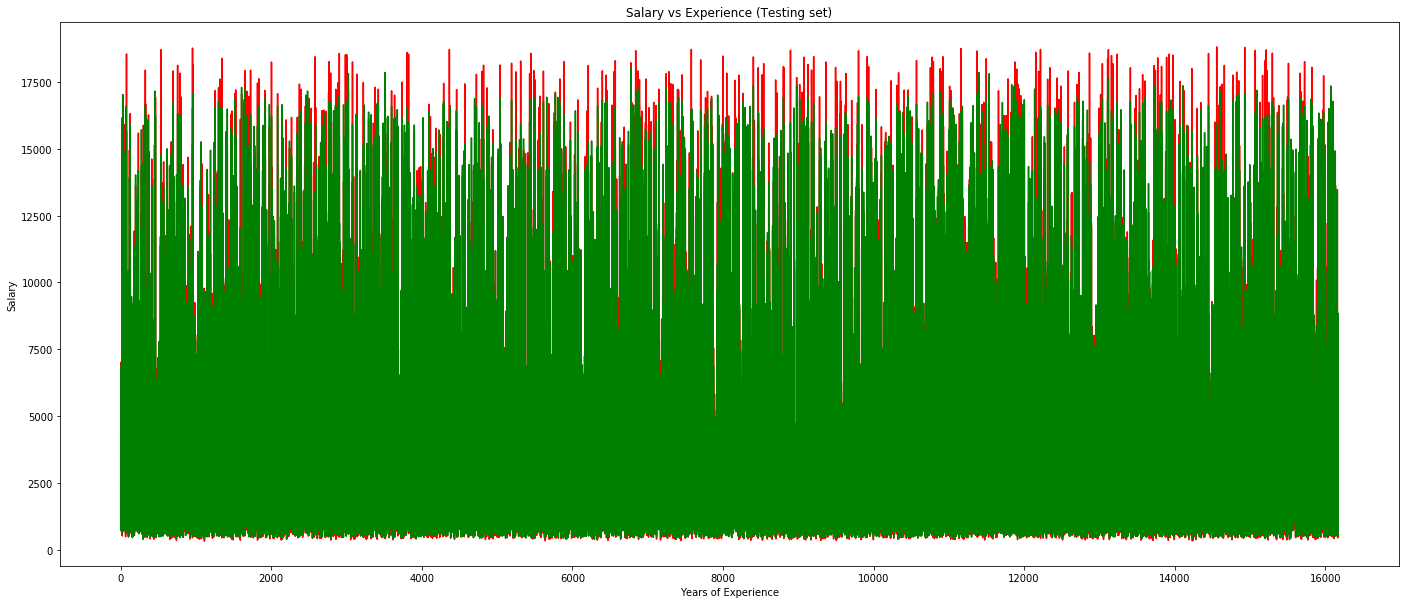

In [20]:
x = range(0,y_test.shape[0])

plt.subplots(figsize=(24,10))
plt.plot(x,y_test, color = "red")
plt.plot(x,y_pred_rndf, color = "green")
plt.title("Salary vs Experience (Testing set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

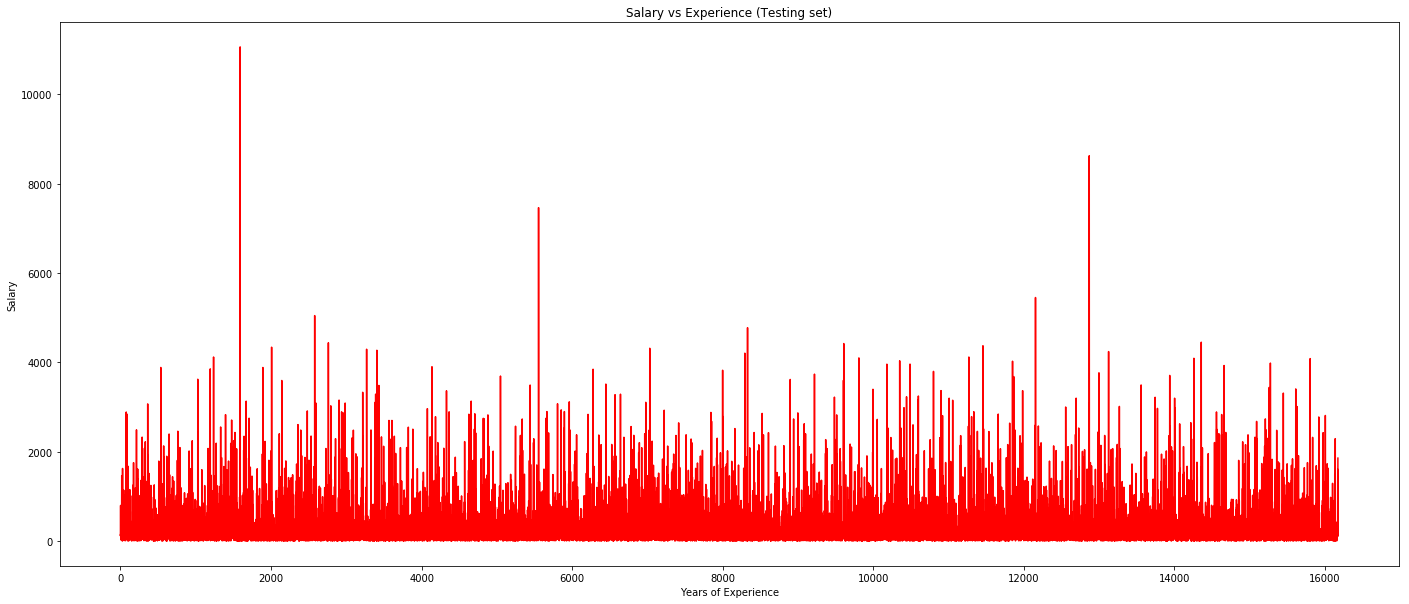

In [21]:

plt.subplots(figsize=(24,10))
plt.plot(x,abs(y_test - y_pred_rndf), color = "red")
plt.title("Salary vs Experience (Testing set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [61]:
#Feature Extraction
data3 = data2.copy()

data3["sum_xyz"] = data3["x"] + data3["y"] + data3["z"] + data3["carat"]
#data3["sum_xy"] = data3["x"] + data3["y"]
#data3["sum_xz"] = data3["x"] + data3["z"]
#data3["sum_yz"] = data3["y"] + data3["z"]

data3["product_xyz"] = data3["x"]*data3["y"]*data3["z"]*data3["carat"]
#data3["product_xy"] = data3["x"]*data3["y"]

data3["sub_xz"] = abs(data3["x"] - data3["z"] - data3["carat"])

data3["sub_xy"] = abs(data3["x"] - data3["y"] - data3["carat"])

data3["ratio_xy"] = data3["x"]*data3["carat"]/data3["y"]
data3["ratio_xz"] = data3["x"]*data3["carat"]/data3["z"]

data3["sub_yz"] = abs(data3["y"] - data3["z"])
data3["ratio_yz"] = data3["y"]/data3["z"]

data3["density"] = data3["carat"]/(data3["x"]*data3["y"]*data3["z"])
data3["depth_table"] = data3["depth"]*data3["table"]

data3["std"] = data3[["x","y","z"]].std(axis=1)
data3["std_oth"] = data3[["carat","depth","table"]].std(axis=1)
data3["skew"] = data3[["x","y","z"]].skew(axis=1)
data3["skew_oth"] = data3[["carat","depth","table"]].skew(axis=1)
#data3["kurt"] = data3[["x","y","z"]].kurtosis(axis=1)
#data3["kurt_oth"] = data3[["carat","depth","table"]].kurtosis(axis=1)

In [63]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(x_train)  # fit 10 trees  
y_pred_train = clf.predict(x_train)
print(list(y_pred_train).count(-1))

x_train["out"] = y_pred_train
x_train = x_train.loc[x_train["out"] == 1]
x_train.drop(columns=["out"],inplace=True)

C:\Users\RC\Anaconda2\envs\tesis\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\RC\Anaconda2\envs\tesis\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\RC\Anaconda2\envs\tesis\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


3774


C:\Users\RC\Anaconda2\envs\tesis\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
x_train, x_test, y_train, y_test = train_test_split(data3, y,random_state = 123, test_size=0.3)

In [67]:
y_train["out"] = y_pred_train
y_train = y_train.loc[y_train["out"] == 1]
y_train.drop(columns=["out"],inplace=True)

In [68]:
#print(100*data3.isnull().sum()/data.shape[0])
#data3.drop(columns=["x","y"],inplace=True)


rndf_reg = RandomForestRegressor(max_depth=10, random_state=0,
                      n_estimators=100)

rndf_reg.fit(x_train,y_train)
y_pred_rndf = rndf_reg.predict(x_test)
print("Mean absolute error LR:",mean_absolute_error(y_test,y_pred_rndf))
print("accuracy: "+ str(rndf_reg.score(x_test,y_test)*100) + "%")

Mean absolute error LR: 426.9124386650014
accuracy: 92.96686023960925%


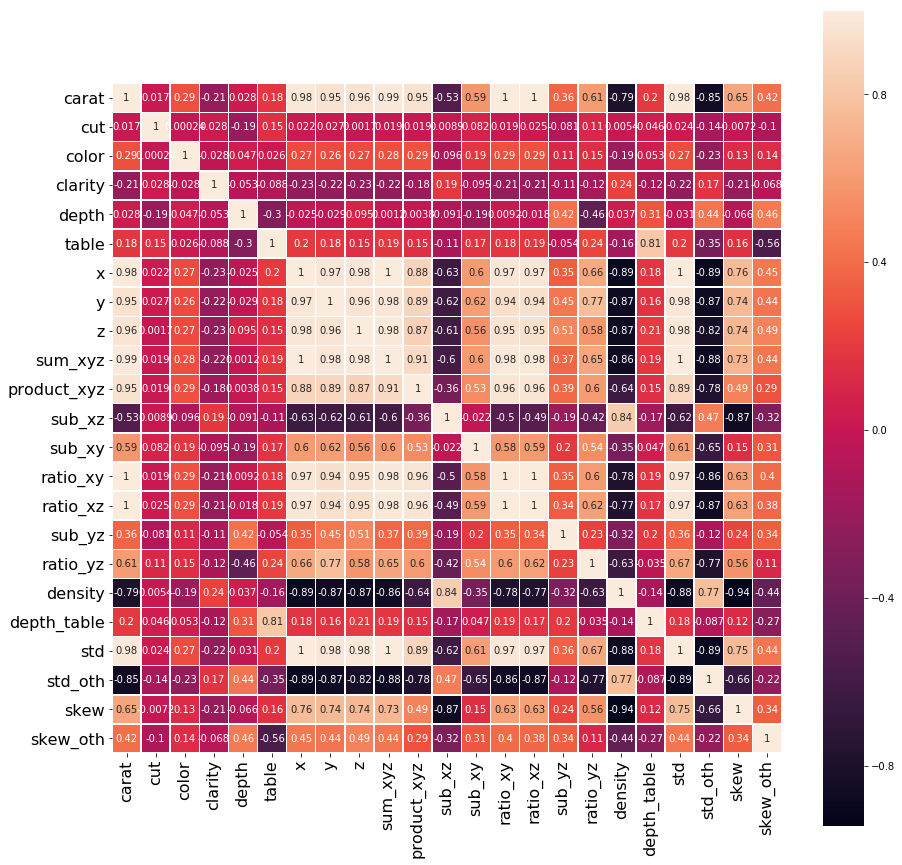

In [48]:
plt.figure(figsize=(15,15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = sns.heatmap(data3.corr(), annot=True, square=True, linecolor='white',linewidths=.5,annot_kws={"size": 10}) 

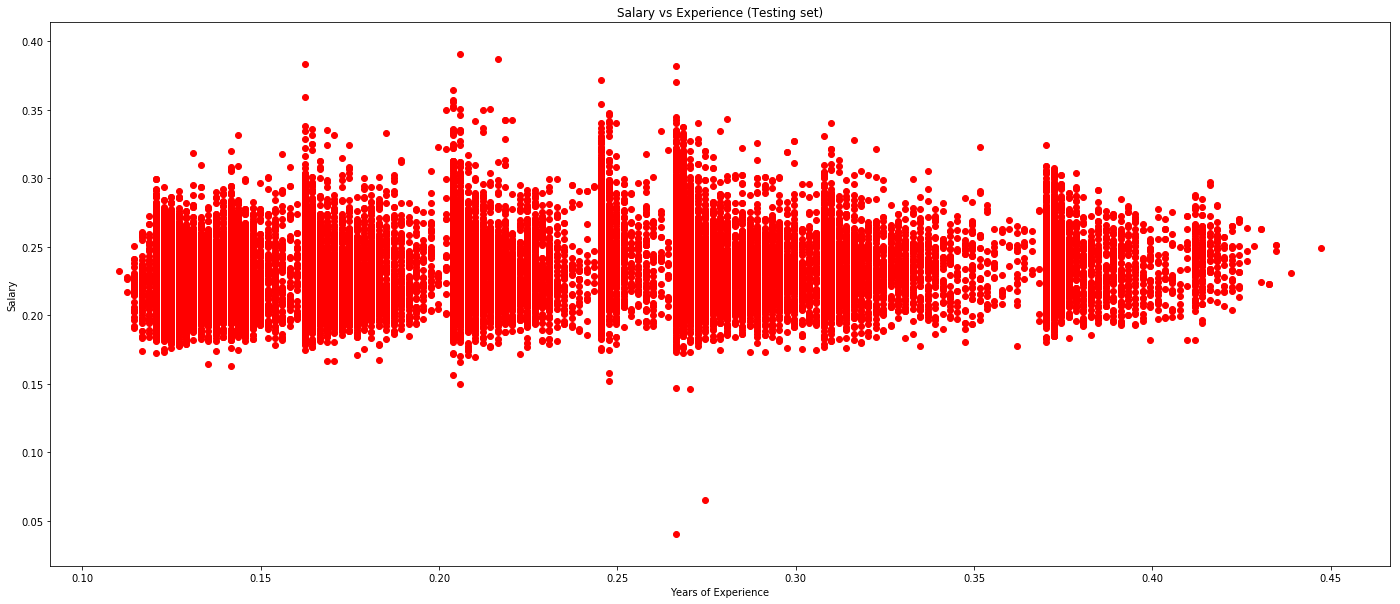

In [64]:
plt.subplots(figsize=(24,10))
plt.scatter(x_train["carat"],x_train["depth_table"], color = "red")
plt.title("Salary vs Experience (Testing set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()